## 1. 2016년도 .csv파일 합치기

### 1) 경로 설정하기

In [1]:
import os
os.chdir("/home/nbuser/library/실습/dust_2016")

### 2) 파일 이름 가져오기

In [2]:
import glob
file_names = glob.glob("*.csv")

### 3) 파일 불러와서 빈리스트에 채워넣기 pd.read_csv

In [3]:
import pandas as pd
data_2016 = []

In [4]:
for i, content in enumerate(file_names):
    print(content)
    data_2016.append(pd.read_csv(content, encoding = "CP949"))

### 4) 모두 합치기 pd.concat

In [5]:
data_2016 = pd.concat(data_2016, ignore_index = True)

### 2. 데이터 길이, 컬럼의 속성을 알라보고, unique한 'region, code'가 어떤 것들이 있는지 알아보시오

### 1) 데이터 길이, 컬럼의 속성

In [6]:
length_2016 = len(data_2016)
print(length_2016)
column_list = data_2016.columns.tolist()
print(column_list)

2818968
['region', 'code', 'site', 'date', 'SO2', 'CO', 'O3', 'NO2', 'dust', 'PM25', '주소']


#### 길이가 너무 긴 관계로 80000개의 데이터만 사용하겠음. 

In [7]:
data_2016 = data_2016.iloc[:80000, :]

### 2) unique한 'region, code'가 어떤 것들이 있는 지 알아보시오

In [8]:
import numpy as np
region_list = np.unique(data_2016['region'])
code_list = np.unique(data_2016['code'])
address_list = np.unique(data_2016['주소'])

In [9]:
print(region_list)
print(code_list)
print(address_list)

['강원 강릉시' '강원 고성군' '강원 동해시' '강원 삼척시' '강원 양구군' '강원 원주시' '강원 정선군' '강원 춘천시'
 '강원 횡성군' '경기 가평군' '경기 고양시' '경기 과천시' '경기 광명시' '경기 광주시' '경기 구리시' '경기 군포시'
 '경기 김포시' '경기 남양주시' '경기 동두천시' '경기 부천시' '경기 성남시']
[131120 131121 131161 131163 131201 131202 131211 131212 131241 131242
 131381 131382 131383 131392 131471 131472 131473 131501 131502 131571
 131611 132112 132113 132401 632121 632122 632132 632151 632161 632371
 632421 632431 831151 831152 831153 831154 831155]
['강원 강릉시 옥천동' '강원 고성군 간성읍' '강원 동해시 천곡동' '강원 삼척시 남양동' '강원 양구군 방산면 송현1리'
 '강원 원주시 명륜동' '강원 원주시 학성동' '강원 정선군 북평면 남평리' '강원 춘천시 석사동' '강원 춘천시 중앙로 3가'
 '강원 횡성군 강림면 강림리(치악산)' '경기 가평군 가평읍 석봉로 181' '경기 고양시 덕양구 행신동 59-3'
 '경기 고양시 일산구 장항2동' '경기 고양시 일산동구 위시티로 151' '경기 과천시 과천동' '경기 과천시 별양동'
 '경기 광명시 소하동' '경기 광명시 철산동' '경기 광주시 경안동' '경기 구리시 교문동' '경기 구리시 인창동'
 '경기 군포시 금정동' '경기 군포시 당동' '경기 김포시 고촌면' '경기 김포시 사우동' '경기 김포시 통진면 마송리'
 '경기 남양주시 금곡동' '경기 남양주시 오남읍 양지리' '경기 동두천시 싸리말로' '경기 부천시 소사구 경인옛로 72'
 '경기 부천시 오정구 삼작로 114' '경기 부천시 오정구 성오로 172' '경기 부천시 원미구 심중로 

## 3. 'data' 컬럼의 '년도', '월'의 컬럼을 따로 만들어 서 추가하려면 어떻게 해야할까? 

### 1) 데이터 만들어 주기

In [11]:
year = [int(str(data_2016['date'][i])[0:4]) for i in range(len(data_2016))]
year = np.array(year)
print(year)

[2016 2016 2016 ... 2016 2016 2016]


In [12]:
month = [int(str(data_2016['date'][i])[4:6]) for i in range(len(data_2016))]
month = np.array(month)
print(month)

[1 1 1 ... 2 2 2]


### 2) 데이터 붙이기

In [13]:
data_2016['year'] = year
data_2016['mm'] = month

### 3) 컬럼 순서 바꿔주기

In [14]:
data_2016 = data_2016[['region', 'code', 'site', 'date','year', 'mm', 'SO2', 'CO', 'O3', 'NO2', 'dust', 'PM25', '주소']]

## 4. 각 장소별 2016년도 월별 평균 만들기

### 장소에 관한 데이터 프레임 -> 월에 관한 데이터 프레임 -> 평균구하기

In [31]:
# 빈 리스트를 만들어 준다. 
month_real = []

# 장소에 관한 데이터 프레임을 만들어 준다. 
for j, region_content in enumerate(region_list):
    print(region_content)
    
    # 장소에 관한 데이터 프레임
    region_data = data_2016[data_2016['region'] == region_list[j]]
    # 그 데이터 프레임 안에 월이 뭐가 들어 있니? 
    region_month = np.unique(region_data['mm'])

    year = 2016

    for i, month_content in enumerate(region_month):
        print(month_content)
        
        mean_data = [region_content, year, month_content]
        # 월에 관한 데이터 프레임
        mean_month = region_data[region_data['mm'] == region_month[i]]
        
        # 월 데이터 프레임의 숫자 값들의 평균
        mean_number = np.mean(mean_month.iloc[:, 6:12])

        mean_data.extend(mean_number)
        
        # 빈 리스트에 채워 넣기
        month_real.append(mean_data)

강원 강릉시
1
2
3
강원 고성군
1
2
3
강원 동해시
1
2
3
강원 삼척시
1
2
3
강원 양구군
1
2
3
강원 원주시
1
2
3
강원 정선군
1
2
3
강원 춘천시
1
2
3
강원 횡성군
1
2
3
경기 가평군
1
2
3
경기 고양시
1
2
3
경기 과천시
1
2
3
경기 광명시
1
2
3
경기 광주시
1
2
3
경기 구리시
1
2
3
경기 군포시
1
2
3
경기 김포시
1
2
3
경기 남양주시
1
2
3
경기 동두천시
1
2
3
경기 부천시
1
2
3
경기 성남시
1
2
3


In [19]:
month_real = pd.DataFrame(month_real)
month_real.columns = ['region', 'year', 'mm', 'SO2', 'CO', 'O3', 'NO2', 'dust', 'PM25']

## 5. Visualization

### 1) dust와 PM25의 일대일 플랏을 그려보시오 

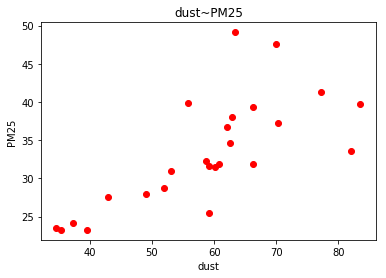

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows = 1, ncols = 1)

ax.scatter(month_real['dust'], month_real['PM25'], color ='red')
ax.set_xlabel("dust")
ax.set_ylabel("PM25")
ax.set_title("dust~PM25")

plt.show()

### 2) correlation plot을 그려보시오 

           SO2        CO        O3       NO2      dust      PM25
SO2   1.000000  0.786873 -0.741522  0.717940  0.458817  0.637996
CO    0.786873  1.000000 -0.694436  0.580860  0.190884  0.407476
O3   -0.741522 -0.694436  1.000000 -0.710138 -0.210934 -0.437069
NO2   0.717940  0.580860 -0.710138  1.000000  0.450502  0.476241
dust  0.458817  0.190884 -0.210934  0.450502  1.000000  0.728070
PM25  0.637996  0.407476 -0.437069  0.476241  0.728070  1.000000


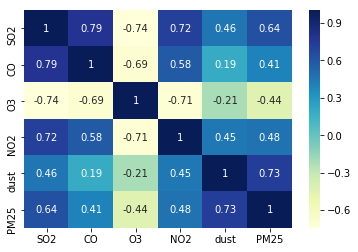

In [23]:
import seaborn as sns
month_real_for_corr = month_real.loc[:, 'SO2' : 'PM25']
corr = month_real_for_corr.corr(method = 'pearson')
print(corr)
ax = sns.heatmap(corr, annot = True, cmap ="YlGnBu")
plt.show()

### 3) 월별 박스 플랏을 그려보시오 

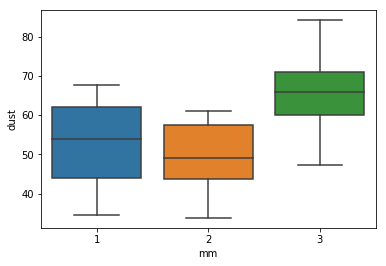

In [24]:
import seaborn as sns
sns.boxplot(x = "mm" , y = "dust", data = month_real)
plt.show()

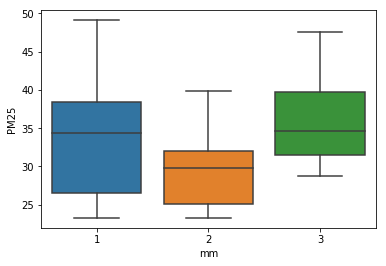

In [25]:
import seaborn as sns
sns.boxplot(x = "mm" , y = "PM25", data = month_real)
plt.show()

## 6. 심화 문제 2017 및 2016 파일을 한꺼번에 가져와서 합치는 코드를 생성해보시오 

## 1) 디렉토리 위치 파악 

In [26]:
os.chdir("/home/nbuser/library/실습")
dir_names = glob.glob("*/")

In [27]:
dir_names

['dust_2017/', 'dust_2016/']

In [29]:
data_all = []

for i, dir_content in enumerate(dir_names):
    os.chdir("/home/nbuser/library/실습/%s" %(dir_content))
    
    file_names = glob.glob("*.csv")
    
    for j, file_content in enumerate(file_names):

        print(file_content)

        data = pd.read_csv(file_content, encoding = "CP949")

        data_all.append(data)

2017-4.csv
2017-2.csv
2017-3.csv
2017-1.csv
2016-1.csv
2016-2.csv
2016-4.csv
2016-3.csv


In [30]:
data_all = pd.concat(data_all, ignore_index = True)